# Scikit-learn tutorial: Predictive Analytics with Python

The Python programming language is a great option for data science and predictive analytics, as it comes equipped with multiple packages which cover most of your data analysis needs. For machine learning in Python, Scikit-learn (sklearn) is a great option and is built on NumPy, SciPy, and matplotlib (N-dimensional arrays, scientific computing, and data visualization respectively). 

## Part 1: Predicting MLB Team Wins per Season

In this tutorial, we’ll test out several machine learning models from sklearn to predict the number of games that a Major League Baseball team will win in a season. If I were a gambling man ([and I most certainly am a gambling man]( http://www.sharpdata.co/online-poker-pro-to-data-science-jedi-master/)), I could build a model using historic data from previous seasons to forecast the upcoming one.  Given the time series nature of the data, we could generate indicators such as average wins per year over the previous five years to make a highly accurate model. That is outside the scope of this tutorial, however and we will treat each row as independent.   Each row of our data will consist of a single team for a specific year.

The full data set originally came from [Sean Lahman's site](http://www.seanlahman.com/baseball-archive/statistics/) and was transformed to a [sqlite database here](https://github.com/jknecht/baseball-archive-sqlite).

### Importing Data

We will read in our data by querying a sqlite database using the `sqlite3` package and converting to a dataframe with `pandas`.  Our data will be filtered to only include currently active modern teams and only years where the team played 150 or more games.

First, download the file "lahman2016.sqlite" ([download here](https://github.com/jknecht/baseball-archive-sqlite/blob/master/lahman2016.sqlite)).  Load `Pandas` and rename to pd for efficiency sake.  Load `sqlite3` and connect to the database.

In [202]:
# Connecting to SQLite Database
import pandas as pd
import sqlite3
conn = sqlite3.connect("lahman2016.sqlite")

Next, we write a query, exicute it and fetch the results.  Using pandas, we then convert our results to a dataframe and print the first 5 rows using the `head()` method. 

**Tip:** If you want to learn more about SQL, consider taking DataCamp’s [Introduction to Databases in Python](https://www.datacamp.com/courses/introduction-to-relational-databases-in-python)

In [203]:
# Querying Database for all seasons where a team played 150 or more games and is still active today.  Creating dataframe from query.
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == "Y";
'''
Teams = conn.execute(query).fetchall()
teams_df = pd.DataFrame(Teams)
print(teams_df.head())

     0   1    2    3     4   5    6     7   8   9   ...        42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...    603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...   1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...    821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...    760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...    566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
2  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
3  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
4  CAL  CAL  CAL  ANA  Los Angeles Angels of Anaheim   Y  None  

[5 rows x 52 columns]


Each of the columns contain data related to a specific team and year.  Some of the more important variables are listed below.  A full list of the variables can be found [here](https://github.com/Sharp-Data/Predicting-MLB-Wins/blob/master/readme2014.txt).

*  `yearID` - Year
*  `teamID` - Team
*  `franchID` - Franchise (links to TeamsFranchise table)
*  `G` - Games played
*  `W` - Wins
*  `LgWin` - League Champion(Y or N)
*  `WSWin` - World Series Winner (Y or N)
*  `R` - Runs scored
*  `AB` - At bats
*  `H` - Hits by batters
*  `HR` - Homeruns by batters
*  `BB` - Walks by batters
*  `SO` - Strikeouts by batters
*  `SB` - Stolen bases
*  `CS` - Caught stealing
*  `HBP` - Batters hit by pitch
*  `SF` - Sacrifice flies
*  `RA` - Opponents runs scored
*  `ER` - Earned runs allowed
*  `ERA` - Earned run average
*  `CG` - Complete games
*  `SHO` - Shutouts
*  `SV` - Saves
*  `IPOuts` - Outs Pitched (innings pitched x 3)
*  `HA` - Hits allowed
*  `HRA` - Homeruns allowed
*  `BBA` - Walks allowed
*  `SOA` - Strikeouts by pitchers
*  `E` - Errors
*  `DP` - Double Plays
*  `FP` - Fielding  percentage
*  `name` - Team's full name


### Cleaning and Preparing our Data

As we can see above, our dataframe doesn't have column headers.  We can add headers by passing a list of our headers to the  `pandas` `.columns` attribute.

In [204]:
# Adding column names to dataframe
cols = ["yearID","lgID","teamID","franchID","divID","Rank","G","Ghome","W",
"L","DivWin","WCWin","LgWin","WSWin","R","AB","H","2B","3B","HR","BB","SO","SB",
"CS","HBP","SF","RA","ER","ERA","CG","SHO","SV","IPouts","HA","HRA","BBA",
"SOA","E","DP","FP","name","park","attendance","BPF","PPF","teamIDBR","teamIDlahman45",
"teamIDretro ","franchID","franchName","active","NAassoc "
]
teams_df.columns = cols
print(teams_df.head())

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L    ...     \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91    ...      
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76    ...      
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91    ...      
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80    ...      
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87    ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro   franchID  \
0     603510  111  112      LAA             LAA           LAA       ANA   
1    1144063   97   97      LAA             LAA           LAA       ANA   
2     821015   94   94      LAA             LAA           LAA       ANA   
3     760439   90   90      LAA             LAA           LAA       ANA   
4     566727   97   98      CAL             CAL           CAL       ANA   

                      franchName  active  NAassoc   
0  Los Angeles Angels of Anaheim 

The `len()` function will let us know how many rows we're dealing with.

In [205]:
print(len(teams_df))

2287


2,287 is not a huge number of data points to work with so hopefully we don't have too many null values.  Let's select the variables we want to use.  This is where knowledge of the data you are working with starts to become very valuable.  It doesn't matter how much you know about coding or statistics, if you don't have any knowledge of the data you are working with, because it will be very difficult to make sense of the data.  Being a lifelong baseball fan certainly helps me with this particular project.

In [206]:
# Selecting our column variables.
df = teams_df[["yearID","teamID","G","W","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP"]]

Null values can cause issues with machine learning algorithms, so we'll remove those next.  There are a few ways to eliminate null values.  Lets display the count of null values for each column so we can decide how to best handle them.

In [207]:
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


We don't have too many null values but we also don't have a large amount of data.  If we eliminate the rows with null values we're losing a little over five percent of our data.  There are 110 null values in the "SO" (Strike outs) column and 22 in the "DP" (Double Play) column. Since we are trying to predict wins, runs scored and runs allowed are highly correlated with wins so we want data in those columns to be very accurate.  Srike outs and Double Plays aren't quite as important so I think we're better off keeping the rows and filling the null values with with the median value from each of the columns.

In [208]:
# Eliminating rows with null values
df = df.dropna()


### Exploring and Visualizing Our Data

Now that we've cleaned up our data, we can do some exploration.  We can get a better feel for our data set with a few simple visualizations.  [`matplotlib`](http://matplotlib.org/) is an excelent library for data visualization.  We import `matplotlib.pyplot` and rename it as `plt` for eficiency.  Since we're working with a jupyter notebook we need to use the  `%matplotlib inline` magic.  We'll start by plotting a histogram of our target column so we can see the distribution of wins.

In [209]:
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(array([  12.,   30.,  102.,  251.,  407.,  478.,  485.,  305.,   76.,    9.]),
 array([  36.,   44.,   52.,   60.,   68.,   76.,   84.,   92.,  100.,
         108.,  116.]),
 <a list of 10 Patch objects>)

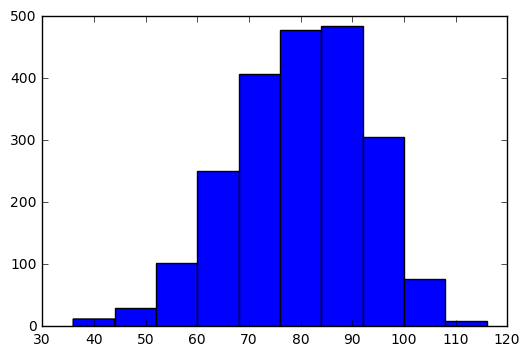

In [210]:
# Plotting distribution of wins
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df["W"])

It can be usefull to create bins for our target column while exploring our data, but we need to make sure not to include any feature that we generate from our target column when we train our model.  Including a column of labels generated from the target column in our training set would be like giving it the answers to the test.
To create our win labels we'll create a function called `assign_win_bins` which will take in an integer value (wins) and retun an integer of 0-8 depending on the input value. Next we'll create a new column `win_bins` by using the apply() method on the wins column and passing in the `assign_win_bins()` function.

In [211]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 40:
        return 0
    if W >= 40 and W <= 49:
        return 1
    if W >= 50 and W <= 59:
        return 2
    if W >= 60 and W <= 69:
        return 3
    if W >= 70 and W <= 79:
        return 4
    if W >= 80 and W <= 89:
        return 5
    if W >= 90 and W <= 99:
        return 6
    if W >= 100 and W <= 109:
        return 7
    if W >= 110 and W <= 119:
        return 8
    
df["win_bins"] = df["W"].apply(assign_win_bins)

Now lets make a scatter graph with the year on the x-axis and wins on the y-axis and we'll highlight the `win_bins` column with colors.

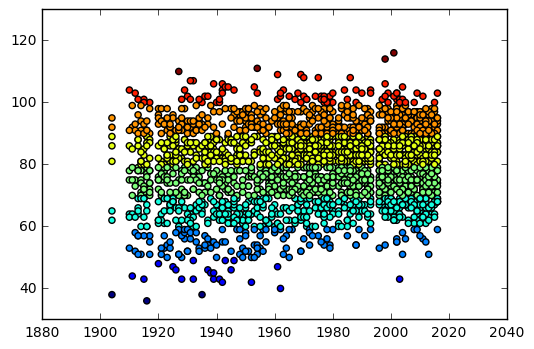

In [212]:
plt.scatter(df["yearID"], df["W"], c=df["win_bins"])

As we can see in the above scatter plot, there are very few seasons from before 1900.  The game was much different back then so it makes sense to eliminate those rows from the data set.

In [213]:
df = df[df["yearID"] > 1900]

When dealing with continuous data and creating linear models, integer values such as a year can cause issues.  It is unlikely that the number 1950 will have the same relationship to the the rest of the data that the model will infer.  We can avoid these issues by creating new variables that label the data based on the `yearID` value.

Anyone who follows the game of baseball knows that as Major League Baseball progressed, different eras emerged where the amount of runs per game increased or decreased significantly.  The dead ball era of the early 1900s is an example of a low scoring era and the steroid era at the turn of the 21st century is an example of a high scoring era.  Let's make a graph below that indicates how much scoring there was for each year.

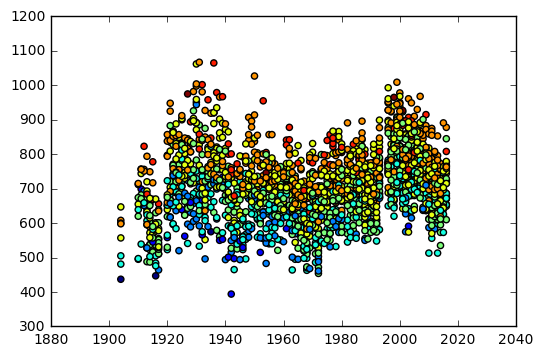

In [214]:
plt.scatter(df["yearID"], df["R"], c=df["win_bins"])

### Adding New Features

Now that we have a better idea of scoring trends, we can create new variables that indicate a specific era that each row of data falls in based on the `yearID`.  We'll follow the same process as we did above when we created the `win_bins` column.  This time however, we will create dummy columns; a new column for each era.  We can use the `get_dummies()` method for this.

In [215]:
# Creating "year_label" column, which will give our algorithm information about how certain years are related (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
    
df["year_label"] = df["yearID"].apply(assign_label)
dummy_df = pd.get_dummies(df["year_label"], prefix="era")
df = pd.concat([df, dummy_df], axis=1)

Now we'll convert the years into decades by creating dummy dolumns for each decade.  Then we can drop the columns that we don't need anymore.

In [216]:
# Converting years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df["decade_label"] = df["yearID"].apply(assign_decade)
decade_df = pd.get_dummies(df["decade_label"], prefix="decade")
df = pd.concat([df, decade_df], axis=1)

In [217]:
df = df.drop(["yearID","year_label","decade_label"], axis=1)

The bottom line in the game of baseball is how many runs you score and how many runs you allow.  You can significantly increase the accuracy of your model by creating columns which are ratios of other columns of data.  Runs per game and runs allowed per game will be great features to add to our data set.  `Pandas` makes this very simple as we create a new column by dividing the `R` column by the `G` column to create the `R_per_game` column.  

In [218]:
# Creating new features for Runs per Game and Runs Allowed per Game
df["R_per_game"] = df["R"] / df["G"]
df["RA_per_game"] = df["RA"] / df["G"]

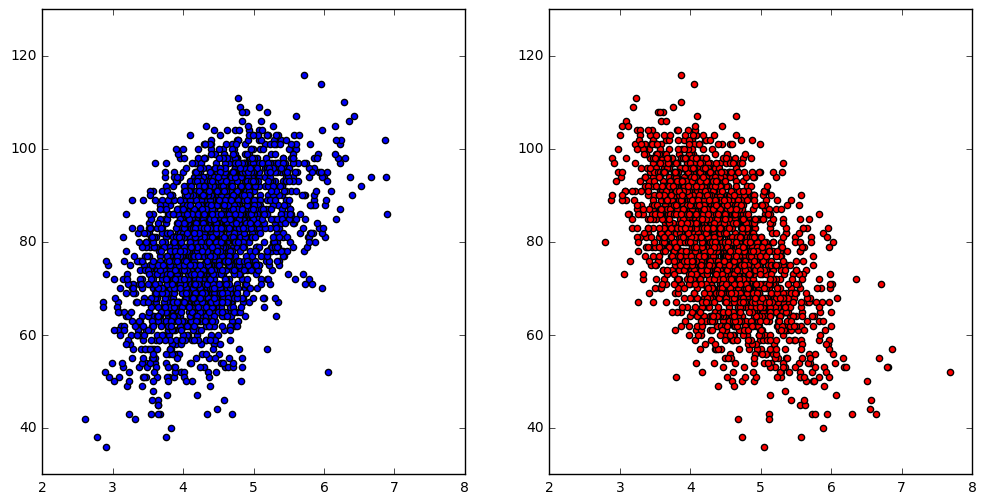

In [219]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df["R_per_game"], df["W"], c="blue")
ax2.scatter(df["RA_per_game"], df["W"], c="red")
plt.show()

In [220]:
print(df.columns)

Index(['teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'win_bins', 'era_1', 'era_2', 'era_3', 'era_4',
       'era_5', 'era_6', 'era_7', 'era_8', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010', 'R_per_game', 'RA_per_game'],
      dtype='object')


In [221]:
df.corr()["W"]

G              0.175290
W              1.000000
R              0.546920
AB             0.241826
H              0.375041
2B             0.247693
3B             0.013477
HR             0.330950
BB             0.345770
SO             0.076779
SB             0.145135
RA            -0.542450
ER            -0.429743
ERA           -0.481040
CG            -0.016828
SHO            0.445153
SV             0.396865
IPouts         0.323082
HA            -0.420675
HRA           -0.014112
BBA           -0.316782
SOA            0.256368
E             -0.311278
DP            -0.017307
FP             0.327276
win_bins       0.975716
era_1         -0.055461
era_2         -0.093346
era_3         -0.036990
era_4         -0.060099
era_5          0.039036
era_6          0.055548
era_7          0.063131
era_8          0.041452
decade_1910   -0.055461
decade_1920   -0.061731
decade_1930   -0.058700
decade_1940   -0.056522
decade_1950   -0.053655
decade_1960    0.025944
decade_1970    0.030786
decade_1980    0

In [222]:
numeric_cols = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8","decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010","R_per_game","RA_per_game","W"]

In [223]:
data = df[numeric_cols]

In [224]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=10, random_state=1)
distances = kmeans_model.fit_transform(data)

In [225]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data)
    s_s = metrics.silhouette_score(data, l)
    s_score_dict[i] = [s_s]
print(s_score_dict)

{2: [0.40218673941274219], 3: [0.26178549479075652], 4: [0.23716760307587781], 5: [0.22050508399651045], 6: [0.19763075696631169], 7: [0.19166506286879806], 8: [0.18343629062013364], 9: [0.17242965028335436], 10: [0.16580233016245924]}


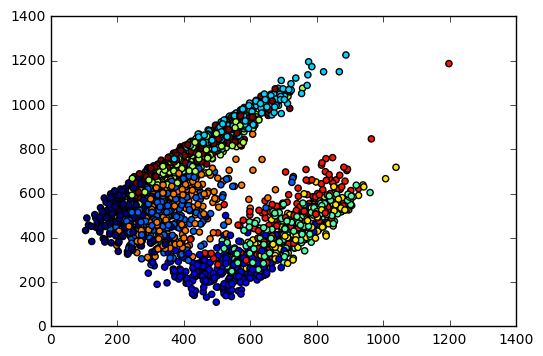

In [226]:
labels = kmeans_model.labels_
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.show()

Before we can build our model, we need to split our data into train and test sets.  If we train our model on the same data that we test the model, our model can easily overfit the data.  An overfit model will perform very poorly when trying to make predictions with new data.  There are a number of ways to cross-validate our model.  This time we will simply take a random sample of 75 percent of our data for the `train` data set and use the other 25 percent for our `test` data set.

In [227]:
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [228]:
attributes = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8",
"decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010","R_per_game","RA_per_game"]

### Selecting Error Metric and Model

Mean Absolute Error is the metric we'll use to determine how accurate our model is. This error metric will provide us with the average absolute value that our prediction missed it's mark.  This means that if, on average, our predictions miss the target amount by 5 wins, our error metric will be 5. 
The first model we will train will be a linear regression model.  We can import `LinearRegression` and `mean_absolute_error` from `sklearn.linear_model` and `sklearn.metrics` respctively.

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [230]:
lr = LinearRegression()
lr.fit(train[attributes], train["W"])
predictions = lr.predict(test[attributes])

In [231]:
mae = mean_absolute_error(test["W"], predictions)
print(mae)

2.50732917556


In [232]:
from sklearn.linear_model import Ridge
rrm = Ridge(alpha = .001)
rrm.fit(train[attributes], train["W"])
predictions_rrm = rrm.predict(test[attributes])
mae_rrm = mean_absolute_error(test["W"], predictions_rrm)
print(mae_rrm)

2.50023721274


## Part II: Predicting Hall of Fame Careers

In [233]:
queryMaster = 'select playerID,nameFirst,nameLast,bats,throws,debut,finalGame from Master;'
queryBatting = 'select * from Batting;'
queryPitching = 'select * from Pitching;'
queryFielding = 'select * from Fielding;'
queryHOF = 'select playerID,yearid from HallofFame where inducted == "Y" and category == "Player";'

In [234]:
master = conn.execute(queryMaster).fetchall()
master_df = pd.DataFrame(master)
batting = conn.execute(queryBatting).fetchall()
batting_df = pd.DataFrame(batting)
pitching = conn.execute(queryPitching).fetchall()
pitching_df = pd.DataFrame(pitching)
fielding = conn.execute(queryFielding).fetchall()
fielding_df = pd.DataFrame(fielding)
hof = conn.execute(queryHOF).fetchall()
hof_df = pd.DataFrame(hof)